<a href="https://colab.research.google.com/github/jeanrobertt/ImersaoDados/blob/main/Aula03_desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 03

**Primeiros passos...**

Importação dos dados

Ajuste nas colunas onde existiam hífens

Alteração do nome da coluna `droga` para `composto`

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

dados.columns = dados.columns.str.replace('-', '')    # Alteração nos nomes das colunas onde existiam hífens

mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)              #Alteração do nome da coluna
dados

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...

Agora o objetivo é entender mais sobre a relação entre as variaveis.

Os primeiros dados a serem analisados são os dados relacionados ao tratamento, e esses são dados categoricos.

Um dos vieses de análise está relacionado às proporções destas categorias e, um gráfico de frequências pode ser muito útil nesse aspecto.

In [81]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Na tabela acima, pode-se ver uma tabela multi-index (mais de um índice) sendo que o index da esquerda se refere aos dados da variável dose e o index da direita são as informações de tempo, respeitando a ordem na qual declaramos as respectivas variáveis.

In [82]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

O parâmetro `normalize` normaliza a tabela(coloca os dados numa mesma escala), no caso isso é feito a partir do índice, ou seja, ela fará a comparação entre as categorias, isto é, a soma de cada linha será igual a 1. 

Fazer este tipo de análise possibilita que sejam feitas algumas suposições acerca do balanceamento entre as categorias e, analisando a matriz, é possível concluir que há proporcionalidade na base de dados.

>Os desafios 01 e 02 foram invertidos

###Desafio 01: Normalizar o crosstab pela coluna


In [7]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

### Desafio 02: Criar tabela de frequência com pandas.groupby()

In [80]:
dados.groupby(by=['dose', 'tempo'])['tratamento'].value_counts().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

No código abaixo é criado uma tabela com as somas de cada nível de dose e tempo.

E depois esses valores são usados para obter a proporção(normalização)

In [92]:
tabela_total = dados.groupby(by=['dose', 'tempo', 'tratamento']).count()['id'].sum(level=[0,1])

(dados.groupby(by=['dose', 'tempo', 'tratamento']).count()['id']/tabela_total).unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

###Desafio 03: Explorar outros agregadores.

Método `.mean()`: Calcula a média dos grupos

In [104]:
dados.groupby(by=['dose', 'tempo','tratamento'])['g0'].mean().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Método `.size()`: Calcula o tamanho dos grupos

In [106]:
dados.groupby(by=['dose', 'tempo','tratamento'])['g0'].size().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Nesse [link](https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/) encontram-se outras agregadoores que podem ser usados com o groupby

###Desafio 04: Explorar o melt.

In [115]:
dados.melt(id_vars=['dose', 'tempo', 'tratamento'], value_vars=['g0'])

,dose,tempo,tratamento,variable,value
0,D1,24,com_droga,g0,1.0620
1,D1,72,com_droga,g0,0.0743
2,D1,48,com_droga,g0,0.6280
3,D1,48,com_droga,g0,-0.5138
4,D2,72,com_droga,g0,-0.3254
...,...,...,...,...,...
23809,D2,24,com_droga,g0,0.1394
23810,D2,24,com_droga,g0,-1.3260
23811,D2,48,com_controle,g0,0.3942
23812,D1,24,com_droga,g0,0.6660


###Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

In [151]:
genes = dados[dados['tratamento'] == 'com_droga'].loc[:, 'g0':'g49']
celulas = dados[dados['tratamento'] == 'com_droga'].loc[:, 'c0':'c49']

tabela = pd.concat([genes, celulas], axis = 1)
tab_corr = tabela.corr().loc[:'g49', 'c0':]
tab_corr

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49
g0,-0.631908,-0.633972,-0.647684,-0.613628,-0.612773,-0.637636,-0.677327,-0.616219,-0.650315,-0.640832,-0.631267,-0.639009,-0.638204,-0.649221,-0.631769,-0.654796,-0.647906,-0.685883,-0.602646,-0.652285,-0.692599,-0.638388,-0.551494,-0.589398,-0.667832,-0.613271,-0.626699,-0.669674,-0.656304,-0.623334,-0.661569,-0.667790,-0.654234,-0.663180,-0.657777,-0.649266,-0.613794,-0.574442,-0.635751,-0.653988,-0.625254,-0.653620,-0.662391,-0.627147,-0.662955,-0.659771,-0.610167,-0.660685,-0.603942,-0.617839
g1,-0.031841,-0.023024,-0.031111,0.018946,-0.018574,0.003835,-0.019734,0.008728,-0.007597,0.020418,-0.000406,-0.018677,-0.009377,-0.026069,-0.008973,0.012306,-0.012649,-0.016771,0.004802,0.005705,-0.001482,-0.005209,0.064228,0.024969,-0.005086,0.030136,-0.010881,-0.011836,-0.018977,-0.007342,0.002220,-0.028096,-0.012174,-0.004820,0.017972,0.000671,-0.024020,-0.029830,-0.018491,0.008753,-0.024750,-0.003445,0.015599,-0.020082,-0.003708,-0.000775,-0.007487,0.009141,0.003686,0.035052
g2,-0.171517,-0.184193,-0.181112,-0.161156,-0.183858,-0.173981,-0.183792,-0.180489,-0.182216,-0.167339,-0.183782,-0.179848,-0.184618,-0.186750,-0.179063,-0.186363,-0.166349,-0.182311,-0.172443,-0.175079,-0.187206,-0.175657,-0.139594,-0.196196,-0.174218,-0.174531,-0.183952,-0.187791,-0.165804,-0.169211,-0.182060,-0.189801,-0.188333,-0.192037,-0.178599,-0.192573,-0.164413,-0.164059,-0.185017,-0.187677,-0.183443,-0.179047,-0.197008,-0.169533,-0.191062,-0.181752,-0.170008,-0.177350,-0.163114,-0.171502
g3,-0.040447,-0.098196,-0.091010,-0.031864,-0.071537,-0.058413,-0.126018,-0.033997,-0.064860,-0.103608,-0.062921,-0.077454,-0.085367,-0.084904,-0.076119,-0.045331,-0.060695,-0.092087,-0.070007,-0.027848,-0.074604,-0.075205,0.071067,-0.004557,-0.064364,-0.008839,-0.116677,-0.072987,-0.090697,-0.040629,-0.061310,-0.103075,-0.044514,-0.097905,-0.046912,-0.051421,-0.082451,-0.035557,-0.106948,-0.030679,-0.089946,-0.049676,-0.070976,-0.072866,-0.067165,-0.078023,-0.034812,-0.073337,-0.062495,-0.036906
g4,-0.418163,-0.390767,-0.404131,-0.370920,-0.374063,-0.397658,-0.375925,-0.390228,-0.396062,-0.358063,-0.389328,-0.395741,-0.392238,-0.397727,-0.409085,-0.392998,-0.401529,-0.400897,-0.351092,-0.407625,-0.419154,-0.390438,-0.330064,-0.364843,-0.404968,-0.383920,-0.365114,-0.418491,-0.393804,-0.394452,-0.387028,-0.403220,-0.429168,-0.377855,-0.404727,-0.395321,-0.395304,-0.371573,-0.375350,-0.400766,-0.392955,-0.398868,-0.370842,-0.405079,-0.399347,-0.402600,-0.368500,-0.405866,-0.360632,-0.362597
g5,0.215371,0.205295,0.217897,0.200823,0.213457,0.210168,0.198405,0.179293,0.209578,0.167370,0.191885,0.213617,0.188461,0.220107,0.190828,0.197126,0.191831,0.189556,0.190585,0.213077,0.184087,0.209095,0.193316,0.185451,0.209798,0.205619,0.194752,0.207934,0.199321,0.206192,0.186216,0.203950,0.199239,0.173663,0.192136,0.202817,0.217381,0.204096,0.192948,0.203270,0.208914,0.209800,0.201371,0.222624,0.190481,0.187191,0.204539,0.195338,0.200061,0.200240
g6,-0.118444,-0.095505,-0.095426,-0.104579,-0.068764,-0.095677,-0.091937,-0.113589,-0.092803,-0.090424,-0.090620,-0.084238,-0.095650,-0.063329,-0.114652,-0.107949,-0.139300,-0.105447,-0.054371,-0.124094,-0.133384,-0.085188,-0.112382,-0.111425,-0.099015,-0.082861,-0.062665,-0.109195,-0.088290,-0.127910,-0.110152,-0.100654,-0.136601,-0.091109,-0.124429,-0.125791,-0.089104,-0.106929,-0.068012,-0.112415,-0.088069,-0.109664,-0.094626,-0.092004,-0.099901,-0.100421,-0.096084,-0.098873,-0.065790,-0.100598
g7,0.506307,0.576042,0.587199,0.541146,0.585801,0.559655,0.611473,0.510641,0.586517,0.604179,0.576074,0.589004,0.608226,0.594255,0.530487,0.581070,0.517456,0.600305,0.588051,0.518390,0.578197,0.582095,0.474978,0.513744,0.589513,0.531786,0.609944,0.573304,0.592089,0.504028,0.555803,0.598498,0.532463,0.606066,0.577641,0.562422,0.564481,0.480504,0.624875,0.5

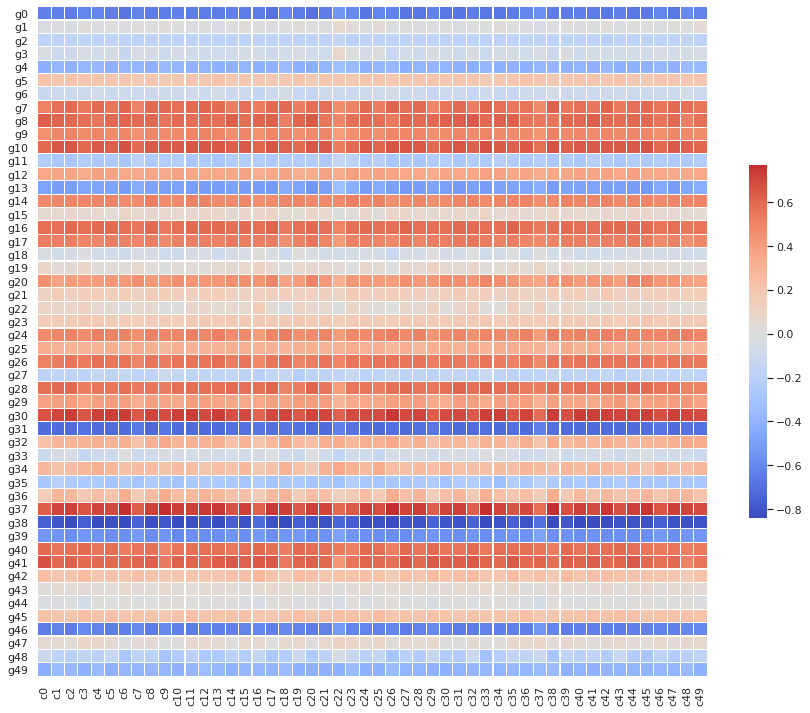

In [164]:
# Configurando o tamanho da área de plot do gráfico
f, ax = plt.subplots(figsize=(15, 13))

# geração da paleta de cores // Nesse caso não utilizei essa paleta de cores
# cmap = sns.diverging_palette(230, 20, as_cmap=True)      

# Desenha o heatmap utilizando a paleta de cores(cmap)
sns.set()
sns.heatmap(tab_corr.round(2), cmap='coolwarm', center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5})
plt.show()

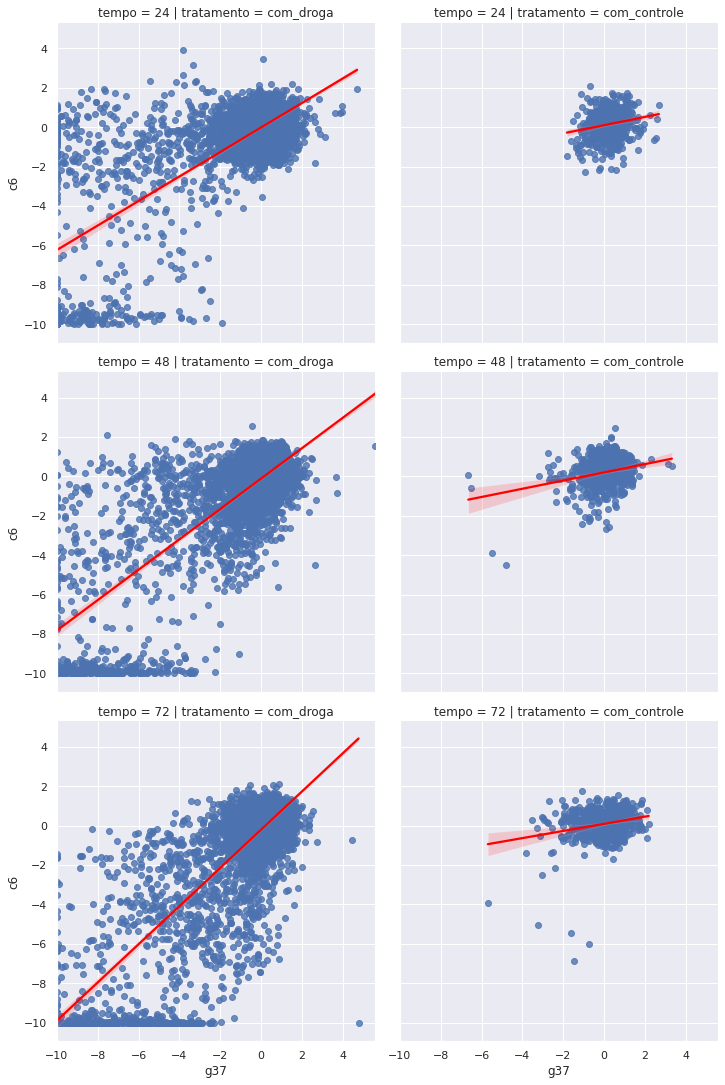

In [153]:
sns.lmplot(data=dados, x = 'g37', y = 'c6', line_kws = {'color': 'red'}, col = 'tratamento', row = 'tempo')

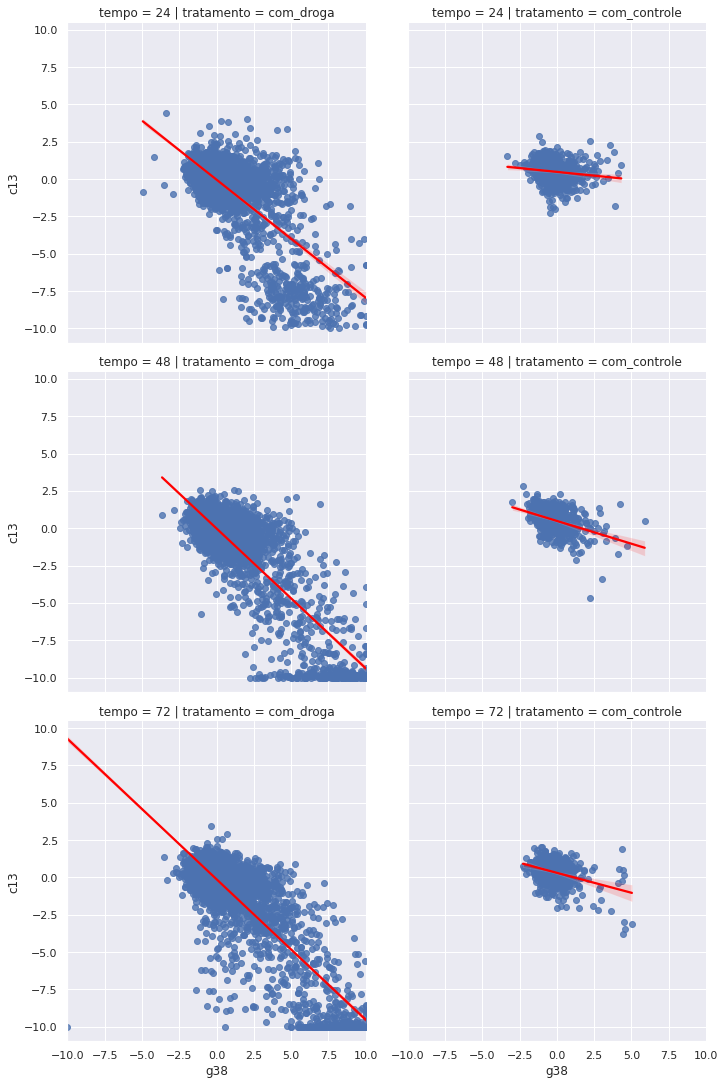

In [152]:
sns.lmplot(data=dados, x = 'g38', y = 'c13', line_kws = {'color': 'red'}, col = 'tratamento', row = 'tempo')

###Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

Para entender como utilizar essa matriz(heatmap), utilizei esse [artigo](http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/).

###Desafio 07: Resumo do que você aprendeu com os dados

Nessa aula foi possível aprender como cruzar informações entre os dados e descobrir por meio de gráficos como o `gráfico de dispersão` e `heatmap`, a correlação entre os dados de genes e tipos de celulas, tanto positiva(quando uma váriavel aumenta a outra também aumenta) quanto negativa(quando uma váriavel aumenta a outra diminui). Porém essa correlação nem sempre implica na casualidade, ou seja, que duas coisas correlacionadas não implicam, necessariamente, no fato de uma ser causa da outra.

Mas já foi possível levantar algumas hipóteses sobre o efeito biológico provocado nas amostras. 

E para ser possível entender melhor o efeito de cada composto sobre as expressões geneticas e 

###Analise sobre o composto `87d714366` que foi o segundo mais utilizado no estudo, atrás apenas do composto usado para controle

In [187]:
cod_compostos = dados['composto'].value_counts().index[0:2]
tab_composto = dados.query('composto in @cod_compostos')

genes = tab_composto[tab_composto['tratamento'] == 'com_droga'].loc[:, 'g0':'g49']
celulas = tab_composto[tab_composto['tratamento'] == 'com_droga'].loc[:, 'c0':'c49']

tabela = pd.concat([genes, celulas], axis = 1)
tab_corr = tabela.corr().loc[:'g49', 'c0':]

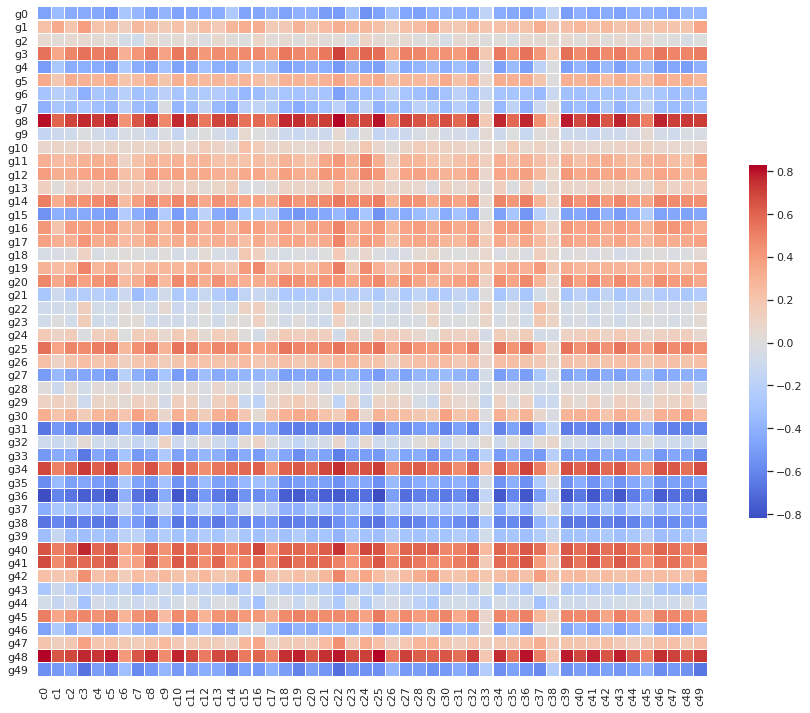

In [194]:
f, ax = plt.subplots(figsize=(15, 13))

sns.set()
sns.heatmap(tab_corr, cmap='coolwarm', center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5})
plt.show()

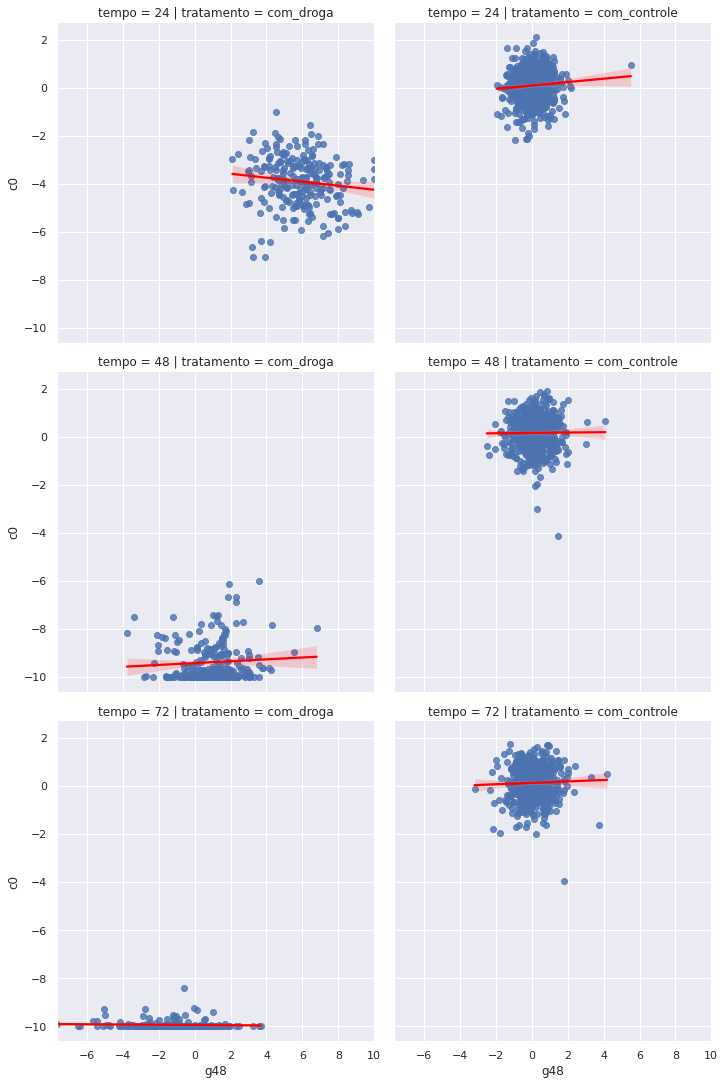

In [189]:
sns.lmplot(data = tab_composto, x = 'g48', y = 'c0', line_kws = {'color': 'red'}, row = 'tempo', col = 'tratamento')

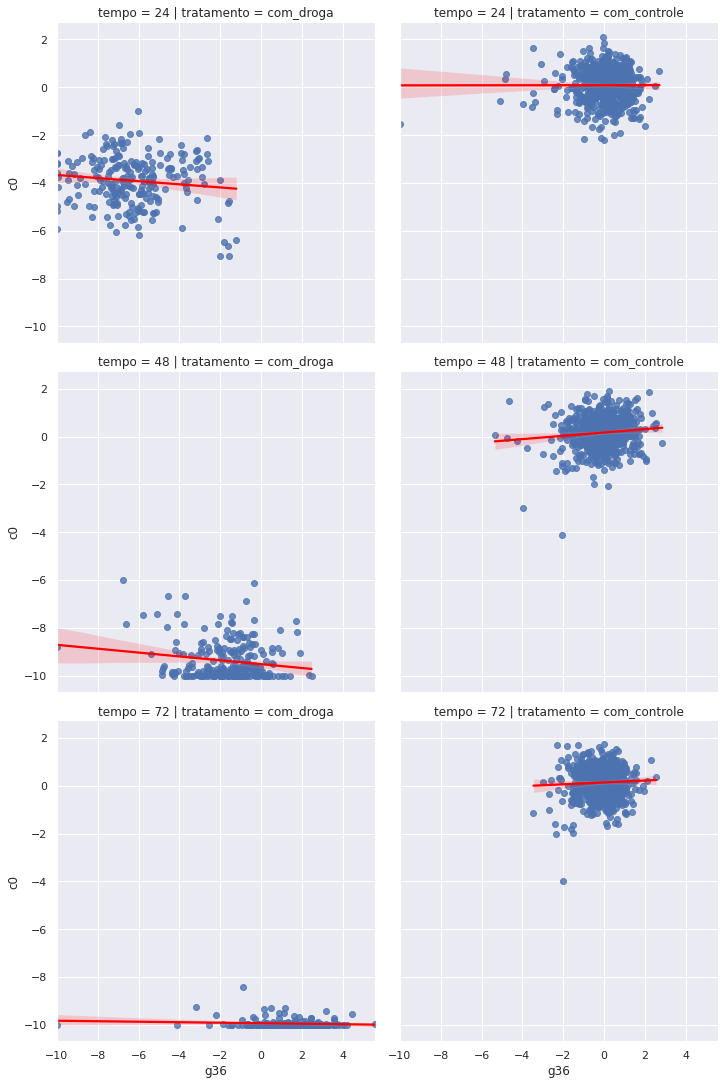

In [190]:
sns.lmplot(data = tab_composto, x = 'g36', y = 'c0', line_kws = {'color': 'red'}, row = 'tempo', col = 'tratamento')